**OASIS INFOBYTE (DATASCIENCE INTERNSHIP)**

**NAME:UMA GANGA VAISHNAVI POTTURI**

CARPRICE_PREDICTION USING **MACHINELEARNING**-TASK3

In [3]:
#importing necessarylibraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("/content/CarPrice.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.shape

(205, 26)

In [7]:
df.size

5330

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df.drop(columns=["car_ID"],inplace=True)

In [12]:
df["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [13]:
df = df.drop_duplicates()

Visualizing the **data**

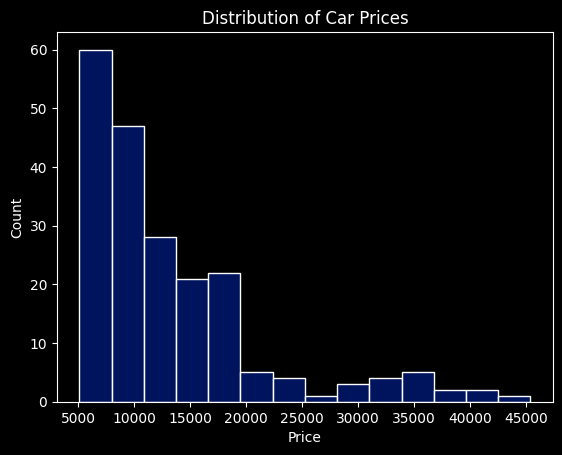

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'wheelbase'),
  Text(0, 1.5, 'carlength'),
  Text(0, 2.5, 'carwidth'),
  Text(0, 3.5, 'carheight'),
  Text(0, 4.5, 'curbweight'),
  Text(0, 5.5, 'enginesize'),
  Text(0, 6.5, 'boreratio'),
  Text(0, 7.5, 'stroke'),
  Text(0, 8.5, 'compressionratio'),
  Text(0, 9.5, 'horsepower'),
  Text(0, 10.5, 'peakrpm'),
  Text(0, 11.5, 'citympg'),
  Text(0, 12.5, 'highwaympg'),
  Text(0, 13.5, 'price')])

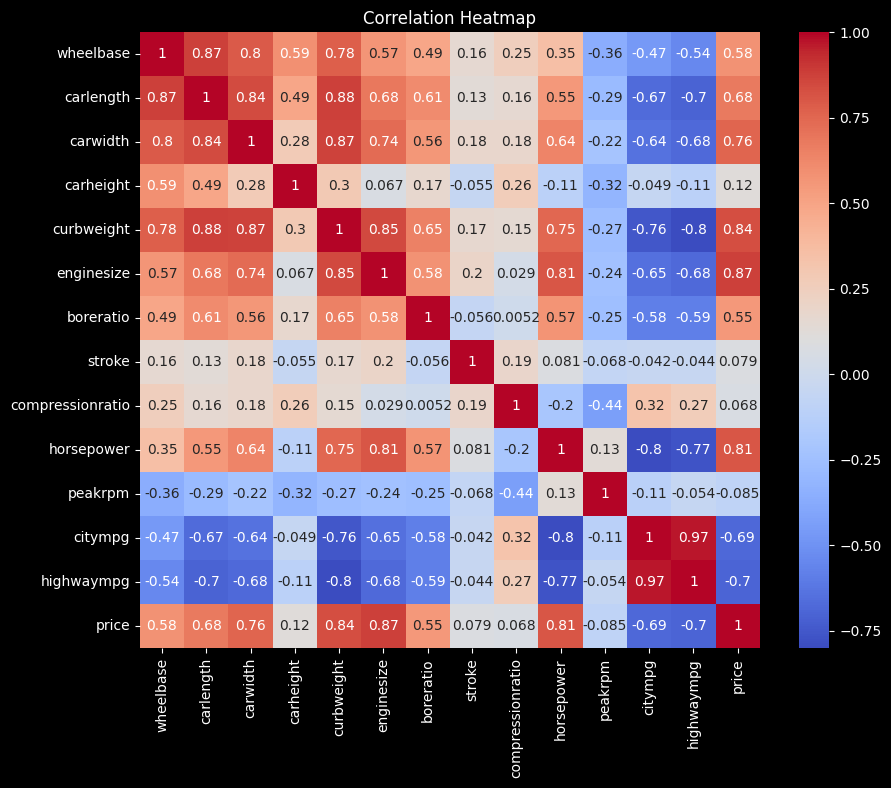

In [14]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(df['price'])
plt.title('Distribution of Car Prices', color='white')
plt.xlabel('Price', color="white")
plt.ylabel('Count', color="white")

plt.xticks(color="white")

plt.yticks(color="white")

plt.show()

numeric_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', "enginesize", 'boreratio', 'stroke', 'compressionratio', 'horsepower',

'peakrpm', 'citympg', 'highwaympg', 'price']

correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title('Correlation Heatmap', color="white")

plt.xticks(color='white')

plt.yticks(color="white")

Preprocessing the **data**

In [15]:
df=df.dropna()

In [16]:
x=df.iloc[:, 0:-1]
x.drop(columns=['CarName'],inplace=True)

In [17]:
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [18]:
y=df.iloc[:,-1]

In [19]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [20]:
label_encoder=LabelEncoder()

In [21]:
for col in x.columns:
  if x[col].dtype=='object':
    x[col]=label_encoder.fit_transform(x[col])

In [22]:
x


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


**Splitting the data**

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

**Fitting the data**

In [24]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Evaluating the model

In [25]:
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

In [26]:
rmse

3989.535026220401